In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn import model_selection as ms
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import RepeatedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import BayesianRidge
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [37]:
df = pd.read_csv('Dataset_linear.csv')
#df

In [38]:
# Ensure unique patients per AgeGroup
selected_patients = df.groupby('AgeGroup')['PatientID'].unique().apply(lambda x: x[:2])  # Get first 2 unique patients per AgeGroup

# Create the dataset with the selected patients
df_selected = df[df.apply(lambda row: row['PatientID'] in selected_patients[row['AgeGroup']], axis=1)]

# Create the dataset with the remaining patients
df_remaining = df[~df.index.isin(df_selected.index)]

In [39]:
print(np.shape(df_selected))
print(np.shape(df_remaining))

(8640, 27)
(34560, 27)


In [40]:
df_traning_in = df_remaining.drop(columns=["Glucose"])
df_traning_ou = df_remaining["Glucose"]
df_test_in = df_selected.drop(columns=["Glucose"])
df_test_ou = df_selected["Glucose"]

In [41]:
X_train = df_traning_in
X_test = df_test_in
y_train = df_traning_ou
y_test = df_test_ou

In [42]:
scaler = MaxAbsScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
regressore = LinearRegression()

In [45]:
regressore.fit(X_train_scaled,y_train)

LinearRegression()

In [46]:
y_train_pred = regressore.predict(X_train_scaled)

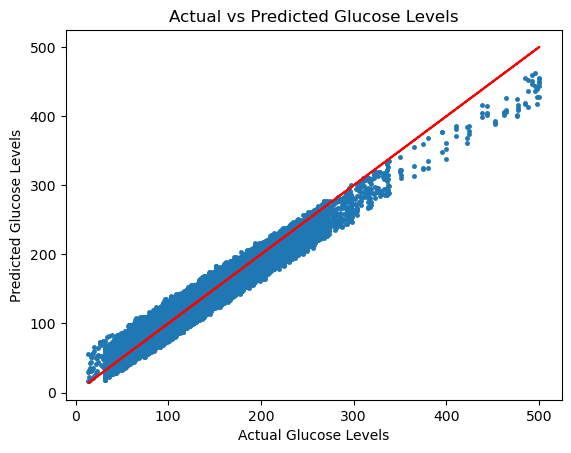

In [47]:
plt.plot(y_train,y_train_pred,'.',markersize=5)
plt.plot(y_train,y_train,'r')
plt.xlabel("Actual Glucose Levels")
plt.ylabel("Predicted Glucose Levels")
plt.title("Actual vs Predicted Glucose Levels")
plt.show()

In [48]:
R2 = regressore.score(X_train_scaled,y_train)
R2

0.8685796571852968

In [49]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

239.03152694437966

In [50]:
y_test_pred =regressore.predict(X_test_scaled)
R2 = regressore.score(X_test_scaled,y_test)
R2

0.6168010865707669

In [51]:
mse = mean_squared_error(y_test, y_test_pred)
mse

406.3492784142706

In [52]:
RMSE = np.sqrt(mse)
RMSE

20.15810701465469

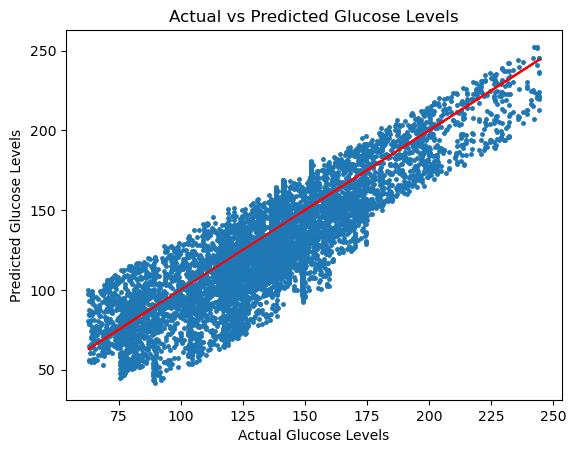

In [53]:
plt.plot(y_test,y_test_pred,'.',markersize=5)
plt.plot(y_test,y_test,'r')
plt.xlabel("Actual Glucose Levels")
plt.ylabel("Predicted Glucose Levels")
plt.title("Actual vs Predicted Glucose Levels")
plt.show()